# Pivot tables and rollups. Netflix top shows database<a id="title"></a>

<img src="https://images.unsplash.com/photo-1560169897-fc0cdbdfa4d5?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8OHx8dHYlMjBzaG93c3xlbnwwfHwwfHx8MA%3D%3D" alt="Television" />
<br/>
<div>
    Founded in 1997 as a movie rental company, <a href= "https://www.netflix.com/browse"><strong>Netflix</strong></a> made a pivotal change in its marketing strategy in the year 2007 when its founders, <strong>Reed Hastings</strong> and <strong>Marc Randolph</strong>, decided to reinvent the company and focus on online video streaming.
</div>
<div>
    Since then, the company has remained as one of the top players in the industry, having an estimated <strong>yearly economic net profit</strong> of <em>373.4 million USD</em> and <em>1850 million USD</em> in <strong>social capital</strong>.
</div>
<div>
    Through the querying of the <strong>Competition Netflix Top 10</strong> PostgreSQL database, this analysis focuses on retrieving a series of relevant indicators, summary tables and plots from Netflix's 2021 and 2022 top shows data, as well as a mockup table of Netflix employees.
</div>

## Table of contents
[Weekly show rankings](#rankings)
<br/>
- [Table head](#head)
- [Unique years](#years)
- [Number of shows and countries](#nums)
- [Most frequent shows in the top 3 (>100 occurrences)](#>100)
- [Top 10 most frequent shows in the top 10](#top10)

[Netflix empoyees by role and department](#employees)

## Weekly show rankings<a id="ranks"></a>

### Table head<a id="head"></a>

In [1]:
SELECT *
FROM all_weeks_countries
LIMIT 5;

,country_name,country_iso2,week,category,weekly_rank,show_title,season_title,cumulative_weeks_in_top_10
0,Argentina,AR,2022-12-04 00:00:00+00:00,Films,1,Troll,N/A,1
1,Argentina,AR,2022-12-04 00:00:00+00:00,Films,2,My Name Is Vendetta,N/A,1
2,Argentina,AR,2022-12-04 00:00:00+00:00,Films,3,The Swimmers,N/A,2
3,Argentina,AR,2022-12-04 00:00:00+00:00,Films,4,Lady Chatterley's Lover,N/A,1
4,Argentina,AR,2022-12-04 00:00:00+00:00,Films,5,Hunter Killer,N/A,1


### Unique years<a id="years"></a>

In [2]:
WITH years AS (
	SELECT DISTINCT EXTRACT(YEAR FROM week) as year
	FROM all_weeks_countries
)

SELECT STRING_AGG(year :: TEXT, ', ') as years
FROM years;

,years
0,"2021, 2022"


### Number of shows and countries<a id="nums"></a>

In [3]:
SELECT COUNT(DISTINCT show_title) AS num_shows
FROM all_weeks_countries;

,num_shows
0,4101


In [4]:
SELECT COUNT(DISTINCT country_name) AS num_countries
FROM all_weeks_countries;

,num_countries
0,94


### Most frequent shows in the top 3 (> 100 occurrences)<a id=">100"></a>

In [5]:
WITH top_3 AS (
	
	SELECT
		country_name AS country,
		EXTRACT(YEAR FROM week) AS year,
		category,
		show_title as title,
		COUNT(show_title) OVER (
			PARTITION BY
				show_title,
				EXTRACT(YEAR FROM week)) as title_count
	
	FROM all_weeks_countries
	
	WHERE
		weekly_rank <= 3
)

SELECT

	DISTINCT title,
	year,
	title_count
	
FROM top_3
WHERE title_count > 100
ORDER BY title_count DESC;

,title,year,title_count
0,Stranger Things,2022,1094
1,Manifest,2022,794
2,Squid Game,2021,729
3,Money Heist,2021,533
4,The Good Doctor,2021,531
...,...,...,...
109,Blonde,2022,103
110,The Snitch Cartel: Origins,2021,103
111,Furioza,2022,103
112,Stay Close,2022,102


### Top 10 most frequent shows in the top 3<a id="top10"></a>

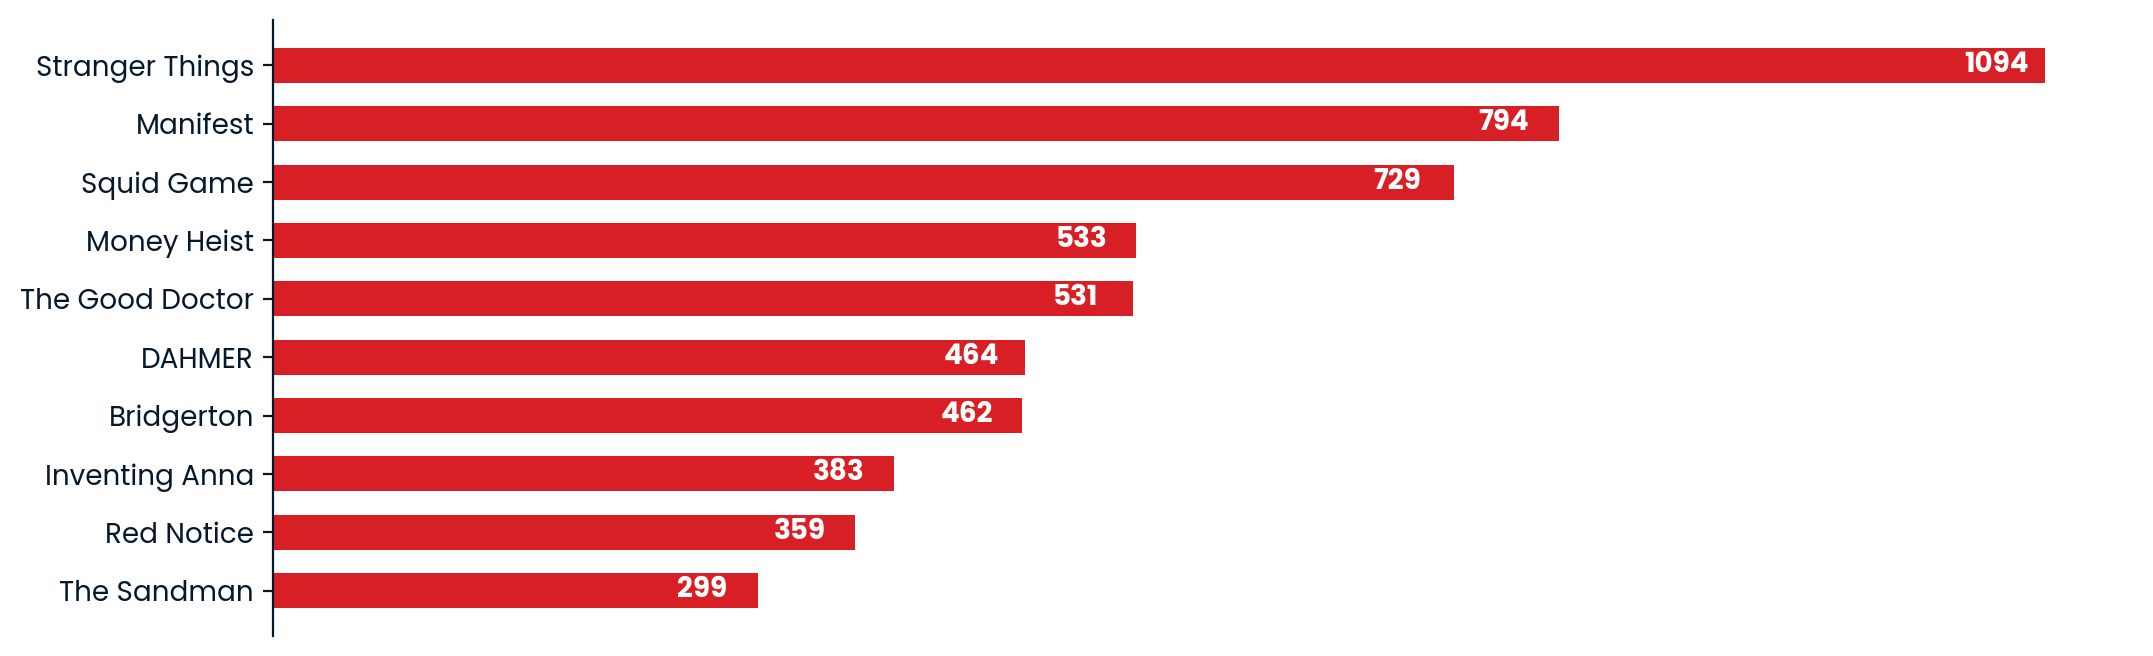

In [6]:
import pandas as pd
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize = (12, 4))

bars = plt.barh(
    data = top_shows.head(10).sort_values(by='title_count'),
    y = 'title',
    width = 'title_count',
    height = 0.6,
    color = '#D81F26')

for bar in bars:
    x_val = bar.get_width()
    y_val = bar.get_y() + bar.get_height() / 2
    ax.text(
        y = y_val,
        x = x_val - 50,
        s = f'{x_val}',
        va = 'center',
        color = 'white',
        fontweight = 'bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)

## Netflix employees by role and department<a id="employees"></a>

In [7]:
SELECT
	COALESCE(role, 'All') AS role,
	COALESCE(department_name, 'All') AS department,
	COUNT(*) as employee_count

FROM
	employees AS e
	INNER JOIN
	departments AS d
	USING (department_id)
	
GROUP BY CUBE(department_name, role)
ORDER BY employee_count, department;

,role,department,employee_count
0,Developer,Engineering,1
1,Manager,Engineering,1
2,Manager,Marketing,1
3,Developer,Marketing,1
4,Developer,All,2
5,Manager,All,2
6,All,Engineering,2
7,All,Marketing,2
8,All,All,4


[Go back up](#title)